In [99]:
import numpy as np
#import modin.pandas as pd
import os
import time
import pandas as pd
from tqdm import tqdm
import networkx as nx
from networkx.algorithms import bipartite
import matplotlib.pyplot as plt

import seaborn as sns

from matplotlib import pyplot as plt

In [100]:
all_graduated = np.load('all_graduated.npy').tolist()
#all_graduated = [x.lower() for x in all_graduated]
all_retired = np.load('all_retired.npy').tolist()
#all_retired = [x.lower() for x in all_retired]

In [101]:
time_resolution = '1week'
data_path = './network_data'+str(time_resolution)+'/'

c_path = './network_data'+time_resolution+'/commits/'
e_path = './network_data'+time_resolution+'/emails/'
#c_path = './network_data/commits/'
mix_path = data_path+"mix/"

In [102]:
df_tech_edges= pd.read_csv("./tech_edges"+str(time_resolution)+".csv") 
df_social_edges= pd.read_csv("./social_edges"+str(time_resolution)+".csv")

In [103]:
df_tech_edges.fillna(0).iloc[2:]

,Blur,VXQuery,SkyWalking,Hama,Wookie,HAWQ,Mnemonic,Graffito,TVM,SINGA,...,Hudi,Groovy,OGNL,Warble,CommonsRDF,RCF,Weex,Directory,JuiCE,Beam
2,300,127.0,482.0,124.0,160.0,151.0,46.0,93.0,882.0,90.0,...,6.0,0.0,132.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,86,34.0,67.0,29.0,16.0,48.0,32.0,23.0,174.0,6.0,...,17.0,0.0,34.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,21,7.0,10.0,16.0,5.0,9.0,5.0,11.0,103.0,10.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,12,1.0,0.0,5.0,1.0,1.0,0.0,2.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,9,0.0,0.0,10.0,0.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [104]:
df_social_edges.fillna(0)

,Rya,FtpServer,Blur,VXQuery,SkyWalking,NetBeans,Edgent,Hama,Wookie,S4,...,MyFaces,mod_ftp,cotton,geronimo,Kabuki,Pivot,Tika,tapestry,OGNL,RCF
0,0,0.0,0,0,0,0,0,0,0,0,...,0,0,0.0,0,0.0,0,0.0,0.0,0,0.0
1,552,146.0,280,120,282,7818,334,410,306,504,...,1784,20,0.0,350,8.0,122,30.0,58.0,728,0.0
2,96,30.0,54,14,12,676,88,54,72,98,...,168,10,0.0,32,0.0,20,6.0,0.0,202,0.0
3,30,0.0,8,6,16,186,26,32,18,24,...,42,0,0.0,14,0.0,4,0.0,0.0,60,0.0


In [105]:
df_tech_edges_graduated = df_tech_edges.fillna(0).iloc[2:][all_graduated]
plt.style.use('ggplot')
plt.figure(figsize=(15,10))
labels_time = [x for x in range(2, len(df_tech_edges))]

#count = count[:20]
#plt.bar(range(20),np.array(count)/265)
datas_t_graduated = []

for time in labels_time:
    data_thistime = df_tech_edges_graduated.loc[time]
    datas_t_graduated.append(data_thistime)



#plt.boxplot(datas_t, labels=labels_time, patch_artist= True, boxprops={'color':'orangered', 'facecolor':'pink'})
#all_retired.remove('Weex')
df_tech_edges_retired = df_tech_edges.fillna(0).iloc[2:][all_retired]


#count = count[:20]
#plt.bar(range(20),np.array(count)/265)
datas_t_retired = []
#for i in range(len(labels_time)):
#    labels_time[i]+=1
print(labels_time)
for time in labels_time:
    data_thistime = df_tech_edges_retired.loc[time]
    datas_t_retired.append(data_thistime)


labels_time = [x for x in labels_time]
df = pd.DataFrame({'Time':labels_time,\
                  'Graduated':datas_t_graduated,'Retired':datas_t_retired})
#plt.boxplot(datas_t, labels=labels_time, patch_artist= True, boxprops={'color':'lightblue', 'facecolor':'lightgreen'})
df = df[['Time','Graduated','Retired']]

#plt.title("Compare Projects Average Overlap : tech Networks")

[2, 3, 4, 5, 6, 7, 8, 9, 10]


<Figure size 1080x720 with 0 Axes>

Text(0.5, 1.0, 'Compare Network Edges : tech Networks')

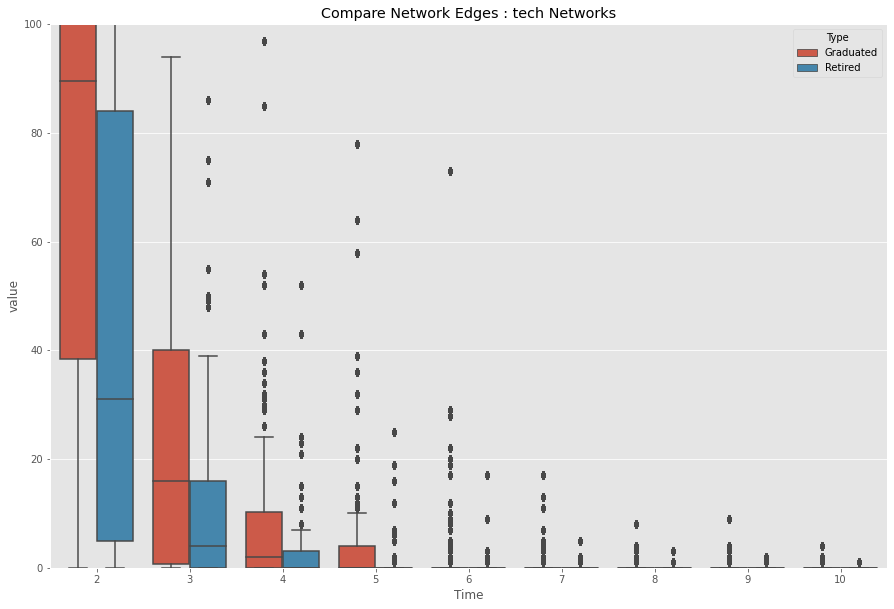

In [106]:
df = df.explode("Graduated")
df = df.explode("Retired")
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)

dd=pd.melt(df,id_vars=['Time'],value_vars=['Graduated','Retired'],var_name='Type')
sns.boxplot(x='Time',y='value',data=dd,hue='Type')
plt.ylim(0, 100)
plt.title("Compare Network Edges : tech Networks")

In [107]:
df_social_edges_graduated = df_social_edges.fillna(0).iloc[2:][all_graduated]
plt.style.use('ggplot')
plt.figure(figsize=(15,10))
labels_time = [x for x in range(2, len(df_social_edges))]

#count = count[:20]
#plt.bar(range(20),np.array(count)/265)
datas_t_graduated = []

for time in labels_time:
    data_thistime = df_social_edges_graduated.loc[time]
    datas_t_graduated.append(data_thistime)



#plt.boxplot(datas_t, labels=labels_time, patch_artist= True, boxprops={'color':'orangered', 'facecolor':'pink'})
all_r = list()
for x in all_retired:
    if x in df_social_edges.columns:
        all_r.append(x) 
df_social_edges_retired = df_social_edges.fillna(0).iloc[2:][all_r]


#count = count[:20]
#plt.bar(range(20),np.array(count)/265)
datas_t_retired = []
#for i in range(len(labels_time)):
#    labels_time[i]+=1
print(labels_time)
for time in labels_time:
    data_thistime = df_social_edges_retired.loc[time]
    datas_t_retired.append(data_thistime)


labels_time = [x for x in labels_time]
df = pd.DataFrame({'Time':labels_time,\
                  'Graduated':datas_t_graduated,'Retired':datas_t_retired})
#plt.boxplot(datas_t, labels=labels_time, patch_artist= True, boxprops={'color':'lightblue', 'facecolor':'lightgreen'})
df = df[['Time','Graduated','Retired']]

#plt.title("Compare Projects Edges : social Networks")

[2, 3]


<Figure size 1080x720 with 0 Axes>

Text(0.5, 1.0, 'Compare Network Edges : Social Networks')

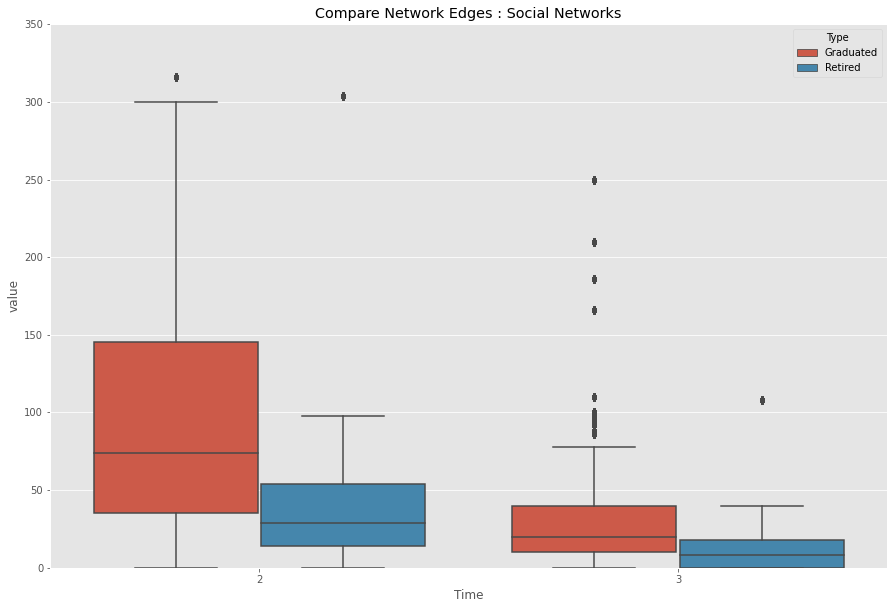

In [108]:
df = df.explode("Graduated")
df = df.explode("Retired")
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)

dd=pd.melt(df,id_vars=['Time'],value_vars=['Graduated','Retired'],var_name='Type')
sns.boxplot(x='Time',y='value',data=dd,hue='Type')
plt.ylim(0, 350)
plt.title("Compare Network Edges : Social Networks")

In [109]:
time_resolution = '2week'
data_path = './network_data'+str(time_resolution)+'/'

c_path = './network_data'+time_resolution+'/commits/'
e_path = './network_data'+time_resolution+'/emails/'
#c_path = './network_data/commits/'
mix_path = data_path+"mix/"

In [110]:
df_tech_edges= pd.read_csv("./tech_edges"+str(time_resolution)+".csv") 
df_social_edges= pd.read_csv("./social_edges"+str(time_resolution)+".csv")

In [111]:
df_tech_edges.fillna(0).iloc[2:]

,SkyWalking,HAWQ,Tez,Hama,Atlas,Celix,DataFu,Wink,IoTDB,Geode,...,TripleSoup,Brooklyn,MetaModel,Directory,CommonsRDF,JuiCE,NetBeans,Groovy,Beam,PredictionIO
2,526,174,175.0,90,218.0,108,5.0,265.0,9491.0,129.0,...,9.0,10.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,93,21,50.0,49,49.0,41,0.0,33.0,134.0,16.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,26,8,17.0,24,7.0,6,0.0,0.0,19.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,11,4,6.0,9,3.0,3,0.0,0.0,81.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,1,2,4.0,4,0.0,4,0.0,0.0,34.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,1,2,0.0,2,0.0,0,0.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0,1,0.0,2,0.0,1,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0,0,0.0,2,0.0,0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,0,0,0.0,1,0.0,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [112]:
df_social_edges.fillna(0).iloc[2:]

,SkyWalking,S4,HAWQ,Druid,Brooklyn,Warble,Tez,Hama,Atlas,ODF Toolkit,...,iBATIS,Pivot,PLC4X,Concerted,WebWork 2,OGNL,cotton,tapestry,Tika,RCF
2,30,82.0,402,112.0,128.0,0.0,60.0,56,92.0,48,...,68.0,16.0,36,14.0,250.0,190.0,0.0,0.0,0.0,0.0
3,6,10.0,148,28.0,32.0,0.0,8.0,22,32.0,30,...,14.0,18.0,8,0.0,50.0,50.0,0.0,0.0,0.0,0.0
4,2,10.0,48,14.0,24.0,0.0,2.0,14,14.0,10,...,8.0,18.0,6,0.0,28.0,22.0,0.0,0.0,0.0,0.0
5,0,4.0,24,10.0,16.0,0.0,0.0,4,6.0,2,...,4.0,2.0,12,0.0,10.0,12.0,0.0,0.0,0.0,0.0
6,2,0.0,2,4.0,4.0,0.0,0.0,2,2.0,0,...,2.0,6.0,2,0.0,16.0,12.0,0.0,0.0,0.0,0.0
7,0,2.0,10,2.0,6.0,0.0,0.0,6,2.0,2,...,0.0,2.0,0,0.0,2.0,6.0,0.0,0.0,0.0,0.0
8,0,2.0,6,0.0,4.0,0.0,0.0,0,0.0,0,...,0.0,0.0,0,0.0,2.0,6.0,0.0,0.0,0.0,0.0
9,0,0.0,10,0.0,2.0,0.0,0.0,2,0.0,0,...,0.0,0.0,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,0,0.0,2,0.0,2.0,0.0,0.0,0,0.0,0,...,0.0,0.0,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11,0,0.0,0,0.0,0.0,0.0,0.0,2,0.0,0,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [113]:
df_tech_edges_graduated = df_tech_edges.fillna(0).iloc[2:][all_graduated]
plt.style.use('ggplot')
plt.figure(figsize=(15,10))
labels_time = [x for x in range(2, len(df_tech_edges))]

#count = count[:20]
#plt.bar(range(20),np.array(count)/265)
datas_t_graduated = []

for time in labels_time:
    data_thistime = df_tech_edges_graduated.loc[time]
    datas_t_graduated.append(data_thistime)



#plt.boxplot(datas_t, labels=labels_time, patch_artist= True, boxprops={'color':'orangered', 'facecolor':'pink'})
#all_retired.remove('Weex')
all_r = list()
for x in all_retired:
    if x in df_social_edges.columns:
        all_r.append(x) 
df_social_edges_retired = df_social_edges.fillna(0).iloc[2:][all_r]


#count = count[:20]
#plt.bar(range(20),np.array(count)/265)
datas_t_retired = []
#for i in range(len(labels_time)):
#    labels_time[i]+=1
print(labels_time)
for time in labels_time:
    data_thistime = df_tech_edges_retired.loc[time]
    datas_t_retired.append(data_thistime)


labels_time = [x*2 for x in labels_time]
df = pd.DataFrame({'Time':labels_time,\
                  'Graduated':datas_t_graduated,'Retired':datas_t_retired})
#plt.boxplot(datas_t, labels=labels_time, patch_artist= True, boxprops={'color':'lightblue', 'facecolor':'lightgreen'})
df = df[['Time','Graduated','Retired']]

#plt.title("Compare Projects Average Overlap : tech Networks")

[2, 3, 4, 5, 6, 7, 8, 9, 10]


<Figure size 1080x720 with 0 Axes>

Text(0.5, 1.0, 'Compare Network Edges : tech Networks')

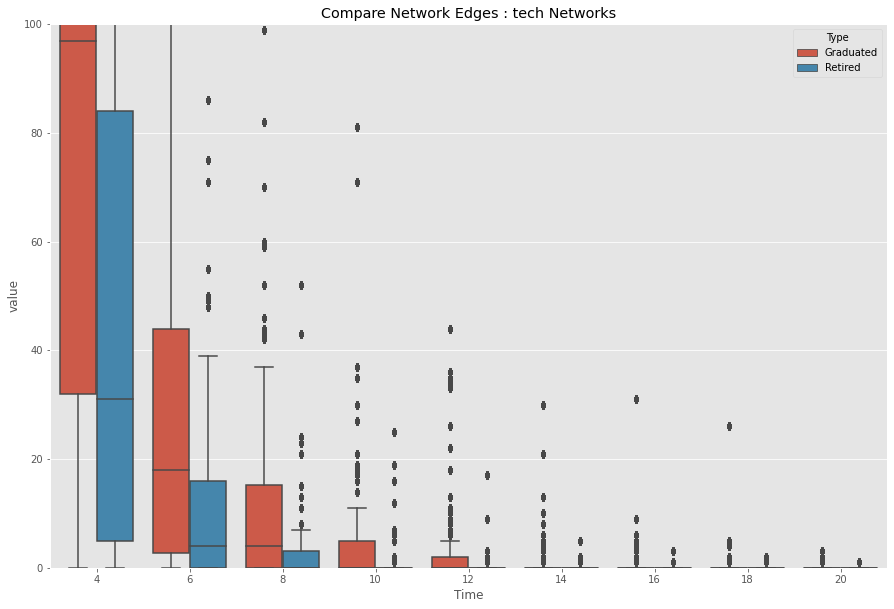

In [114]:
df = df.explode("Graduated")
df = df.explode("Retired")
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)

dd=pd.melt(df,id_vars=['Time'],value_vars=['Graduated','Retired'],var_name='Type')
sns.boxplot(x='Time',y='value',data=dd,hue='Type')
plt.ylim(0, 100)
#plt.xlim(0, 25)
plt.title("Compare Network Edges : tech Networks")

In [115]:
df_social_edges_graduated = df_social_edges.fillna(0).iloc[2:][all_graduated]
plt.style.use('ggplot')
plt.figure(figsize=(15,10))
labels_time = [x for x in range(2, len(df_social_edges))]

#count = count[:20]
#plt.bar(range(20),np.array(count)/265)
datas_t_graduated = []

for time in labels_time:
    data_thistime = df_social_edges_graduated.loc[time]
    datas_t_graduated.append(data_thistime)



#plt.boxplot(datas_t, labels=labels_time, patch_artist= True, boxprops={'color':'orangered', 'facecolor':'pink'})
all_r = list()
for x in all_retired:
    if x in df_social_edges.columns:
        all_r.append(x) 
df_social_edges_retired = df_social_edges.fillna(0).iloc[2:][all_r]


#count = count[:20]
#plt.bar(range(20),np.array(count)/265)
datas_t_retired = []
#for i in range(len(labels_time)):
#    labels_time[i]+=1
print(labels_time)
for time in labels_time:
    data_thistime = df_social_edges_retired.loc[time]
    datas_t_retired.append(data_thistime)


labels_time = [x*2 for x in labels_time]
df = pd.DataFrame({'Time':labels_time,\
                  'Graduated':datas_t_graduated,'Retired':datas_t_retired})
#plt.boxplot(datas_t, labels=labels_time, patch_artist= True, boxprops={'color':'lightblue', 'facecolor':'lightgreen'})
df = df[['Time','Graduated','Retired']]

#plt.title("Compare Projects Edges : social Networks")

[2, 3, 4, 5, 6, 7, 8, 9, 10, 11]


<Figure size 1080x720 with 0 Axes>

Text(0.5, 1.0, 'Compare Network Edges : social Networks')

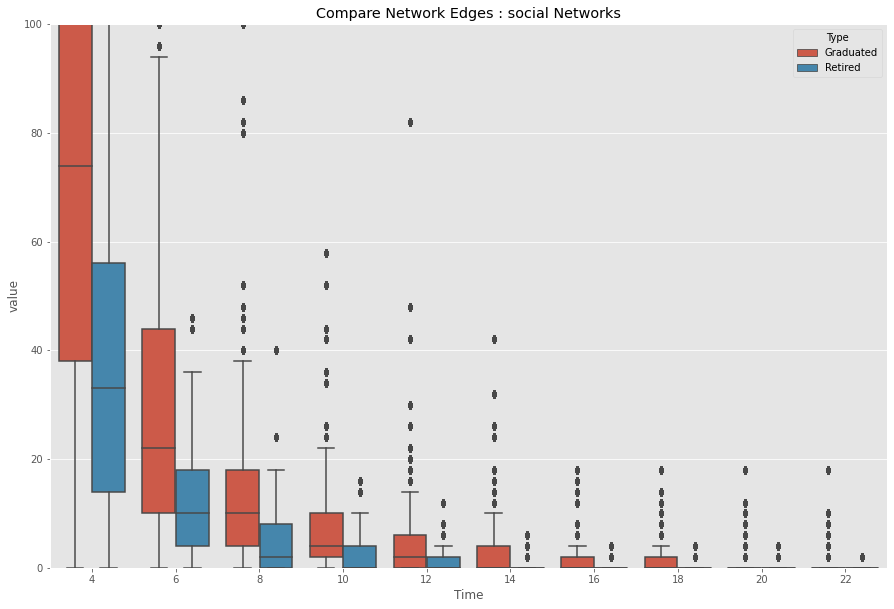

In [116]:
df = df.explode("Graduated")
df = df.explode("Retired")
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)

dd=pd.melt(df,id_vars=['Time'],value_vars=['Graduated','Retired'],var_name='Type')
sns.boxplot(x='Time',y='value',data=dd,hue='Type')
plt.ylim(0, 100)
#plt.xlim(0, 25)
plt.title("Compare Network Edges : social Networks")

In [117]:
time_resolution = '3week'
data_path = './network_data'+str(time_resolution)+'/'

c_path = './network_data'+time_resolution+'/commits/'
e_path = './network_data'+time_resolution+'/emails/'
#c_path = './network_data/commits/'
mix_path = data_path+"mix/"

df_tech_edges= pd.read_csv("./tech_edges"+str(time_resolution)+".csv") 
df_social_edges= pd.read_csv("./social_edges"+str(time_resolution)+".csv")

In [118]:
df_tech_edges_graduated = df_tech_edges.fillna(0).iloc[2:][all_graduated]
plt.style.use('ggplot')
plt.figure(figsize=(15,10))
labels_time = [x for x in range(2, len(df_tech_edges))]

#count = count[:20]
#plt.bar(range(20),np.array(count)/265)
datas_t_graduated = []

for time in labels_time:
    data_thistime = df_tech_edges_graduated.loc[time]
    datas_t_graduated.append(data_thistime)



#plt.boxplot(datas_t, labels=labels_time, patch_artist= True, boxprops={'color':'orangered', 'facecolor':'pink'})
all_r = list()
for x in all_retired:
    if x in df_tech_edges.columns:
        all_r.append(x) 
df_tech_edges_retired = df_tech_edges.fillna(0).iloc[2:][all_r]


#count = count[:20]
#plt.bar(range(20),np.array(count)/265)
datas_t_retired = []
#for i in range(len(labels_time)):
#    labels_time[i]+=1
print(labels_time)
for time in labels_time:
    data_thistime = df_tech_edges_retired.loc[time]
    datas_t_retired.append(data_thistime)


labels_time = [x*3 for x in labels_time]
df = pd.DataFrame({'Time':labels_time,\
                  'Graduated':datas_t_graduated,'Retired':datas_t_retired})
#plt.boxplot(datas_t, labels=labels_time, patch_artist= True, boxprops={'color':'lightblue', 'facecolor':'lightgreen'})
df = df[['Time','Graduated','Retired']]

#plt.title("Compare Projects Average Overlap : tech Networks")

[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]


<Figure size 1080x720 with 0 Axes>

Text(0.5, 1.0, 'Compare Projects Average Overlap : tech Networks')

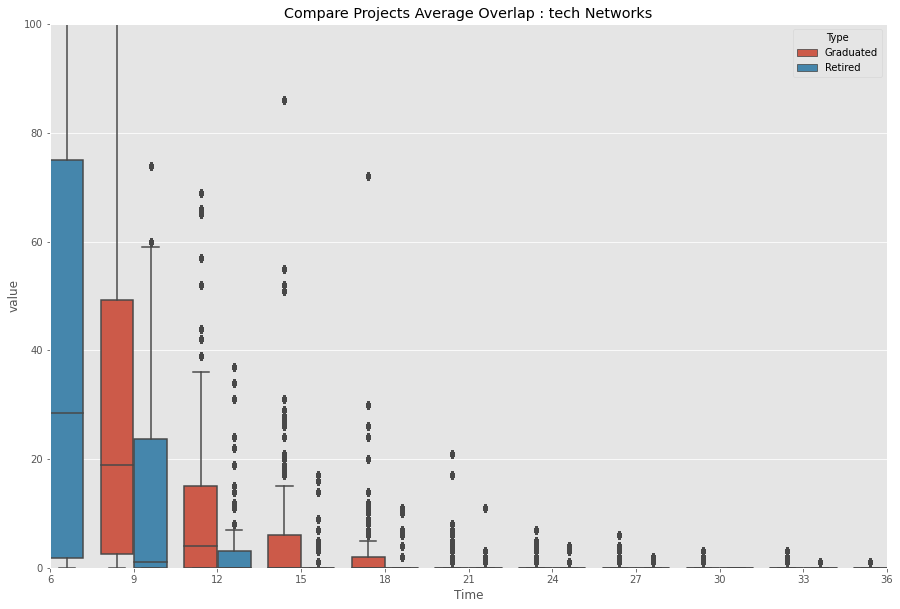

In [119]:
df = df.explode("Graduated")
df = df.explode("Retired")
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)

dd=pd.melt(df,id_vars=['Time'],value_vars=['Graduated','Retired'],var_name='Type')
sns.boxplot(x='Time',y='value',data=dd,hue='Type')
plt.ylim(0, 100)
plt.xlim(0, 10)
plt.title("Compare Projects Average Overlap : tech Networks")

In [120]:
df_social_edges_graduated = df_social_edges.fillna(0).iloc[2:][all_graduated]
plt.style.use('ggplot')
plt.figure(figsize=(15,10))
labels_time = [x for x in range(2, len(df_social_edges))]

#count = count[:20]
#plt.bar(range(20),np.array(count)/265)
datas_t_graduated = []

for time in labels_time:
    data_thistime = df_social_edges_graduated.loc[time]
    datas_t_graduated.append(data_thistime)



#plt.boxplot(datas_t, labels=labels_time, patch_artist= True, boxprops={'color':'orangered', 'facecolor':'pink'})
all_r = list()
for x in all_retired:
    if x in df_social_edges.columns:
        all_r.append(x) 
df_social_edges_retired = df_social_edges.fillna(0).iloc[2:][all_r]


#count = count[:20]
#plt.bar(range(20),np.array(count)/265)
datas_t_retired = []
#for i in range(len(labels_time)):
#    labels_time[i]+=1
print(labels_time)
for time in labels_time:
    data_thistime = df_social_edges_retired.loc[time]
    datas_t_retired.append(data_thistime)


labels_time = [x*3 for x in labels_time]
df = pd.DataFrame({'Time':labels_time,\
                  'Graduated':datas_t_graduated,'Retired':datas_t_retired})
#plt.boxplot(datas_t, labels=labels_time, patch_artist= True, boxprops={'color':'lightblue', 'facecolor':'lightgreen'})
df = df[['Time','Graduated','Retired']]

#plt.title("Compare Projects Edges : social Networks")

[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]


<Figure size 1080x720 with 0 Axes>

Text(0.5, 1.0, 'Compare Network Edges : social Networks')

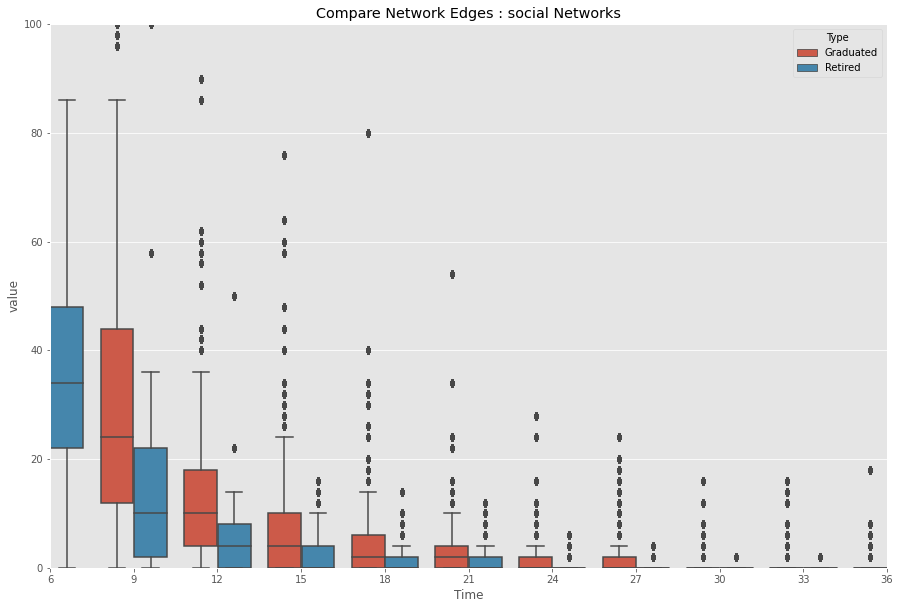

In [121]:
df = df.explode("Graduated")
df = df.explode("Retired")
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)

dd=pd.melt(df,id_vars=['Time'],value_vars=['Graduated','Retired'],var_name='Type')
sns.boxplot(x='Time',y='value',data=dd,hue='Type')
plt.ylim(0, 100)
plt.xlim(0, 10)
plt.title("Compare Network Edges : social Networks")

In [122]:
time_resolution = 1

data_path = '/mnt/data0/proj_osgeo/data_ASF_trial/network_data'+str(time_resolution)+'/'

c_path = './network_data'+str(time_resolution)+'/commits/'
e_path = './network_data'+str(time_resolution)+'/emails/'
mix_path = './network_data'+str(time_resolution)+'/mix/'
#c_path = './network_data/commits/'

df_tech_overlaps = pd.read_csv("./tech_overlaps_series"+str(time_resolution)+".csv")
df_tech_overlaps = pd.read_csv("./tech_overlaps_series"+str(time_resolution)+".csv")
df_mix_overlaps = pd.read_csv("./mix_overlaps_series"+str(time_resolution)+".csv")


In [123]:
df_tech_edges_graduated = df_tech_edges.fillna(0).iloc[2:][all_graduated]
plt.style.use('ggplot')
plt.figure(figsize=(15,10))
labels_time = [x for x in range(2, len(df_tech_edges))]

#count = count[:20]
#plt.bar(range(20),np.array(count)/265)
datas_t_graduated = []

for time in labels_time:
    data_thistime = df_tech_edges_graduated.loc[time]
    datas_t_graduated.append(data_thistime)



#plt.boxplot(datas_t, labels=labels_time, patch_artist= True, boxprops={'color':'orangered', 'facecolor':'pink'})
all_r = list()
for x in all_retired:
    if x in df_tech_edges.columns:
        all_r.append(x) 
df_tech_edges_retired = df_tech_edges.fillna(0).iloc[2:][all_r]


#count = count[:20]
#plt.bar(range(20),np.array(count)/265)
datas_t_retired = []
#for i in range(len(labels_time)):
#    labels_time[i]+=1
print(labels_time)
for time in labels_time:
    data_thistime = df_tech_edges_retired.loc[time]
    datas_t_retired.append(data_thistime)


labels_time = [x*4 for x in labels_time]
df = pd.DataFrame({'Time':labels_time,\
                  'Graduated':datas_t_graduated,'Retired':datas_t_retired})
#plt.boxplot(datas_t, labels=labels_time, patch_artist= True, boxprops={'color':'lightblue', 'facecolor':'lightgreen'})
df = df[['Time','Graduated','Retired']]

#plt.title("Compare Projects Average Overlap : tech Networks")

[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]


<Figure size 1080x720 with 0 Axes>

Text(0.5, 1.0, 'Compare Projects Average Overlap : tech Networks')

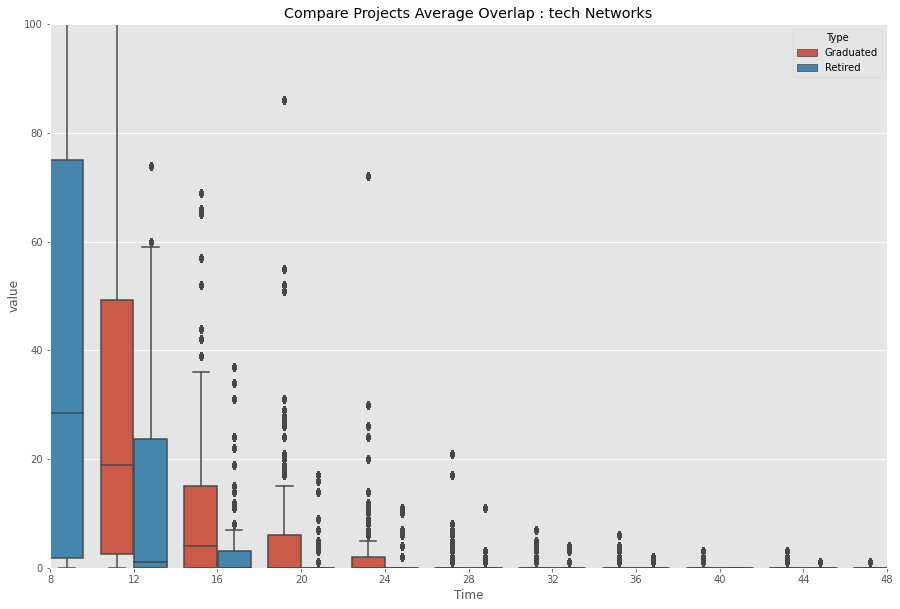

In [124]:
df = df.explode("Graduated")
df = df.explode("Retired")
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)

dd=pd.melt(df,id_vars=['Time'],value_vars=['Graduated','Retired'],var_name='Type')
sns.boxplot(x='Time',y='value',data=dd,hue='Type')
plt.ylim(0, 100)
plt.xlim(0, 10)
plt.title("Compare Projects Average Overlap : tech Networks")

In [125]:
df_social_edges_graduated = df_social_edges.fillna(0).iloc[2:][all_graduated]
plt.style.use('ggplot')
plt.figure(figsize=(15,10))
labels_time = [x for x in range(2, len(df_social_edges))]

#count = count[:20]
#plt.bar(range(20),np.array(count)/265)
datas_t_graduated = []

for time in labels_time:
    data_thistime = df_social_edges_graduated.loc[time]
    datas_t_graduated.append(data_thistime)



#plt.boxplot(datas_t, labels=labels_time, patch_artist= True, boxprops={'color':'orangered', 'facecolor':'pink'})
all_r = list()
for x in all_retired:
    if x in df_social_edges.columns:
        all_r.append(x) 
df_social_edges_retired = df_social_edges.fillna(0).iloc[2:][all_r]


#count = count[:20]
#plt.bar(range(20),np.array(count)/265)
datas_t_retired = []
#for i in range(len(labels_time)):
#    labels_time[i]+=1
print(labels_time)
for time in labels_time:
    data_thistime = df_social_edges_retired.loc[time]
    datas_t_retired.append(data_thistime)


labels_time = [x*3 for x in labels_time]
df = pd.DataFrame({'Time':labels_time,\
                  'Graduated':datas_t_graduated,'Retired':datas_t_retired})
#plt.boxplot(datas_t, labels=labels_time, patch_artist= True, boxprops={'color':'lightblue', 'facecolor':'lightgreen'})
df = df[['Time','Graduated','Retired']]

#plt.title("Compare Projects Edges : social Networks")

[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]


<Figure size 1080x720 with 0 Axes>

Text(0.5, 1.0, 'Compare Network Edges : social Networks')

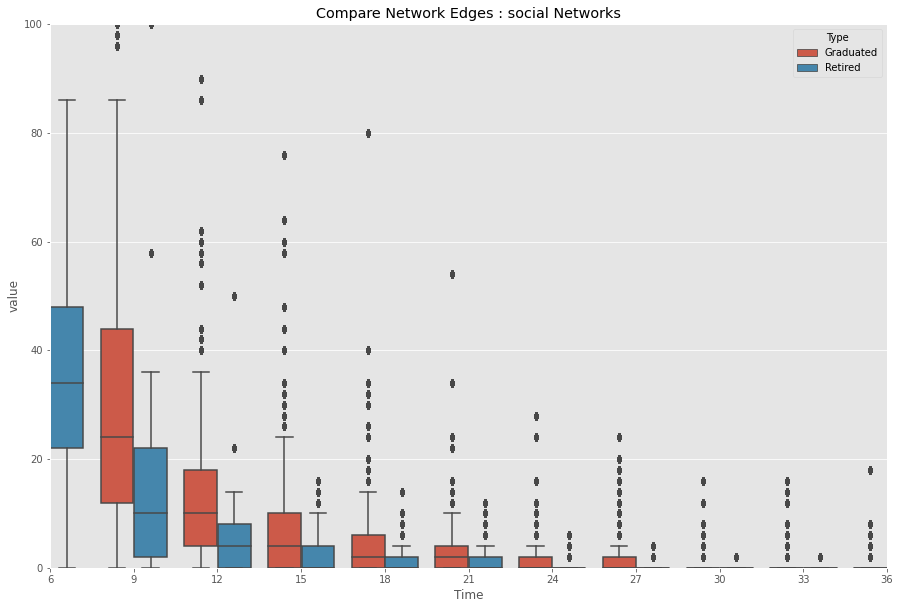

In [126]:
df = df.explode("Graduated")
df = df.explode("Retired")
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)

dd=pd.melt(df,id_vars=['Time'],value_vars=['Graduated','Retired'],var_name='Type')
sns.boxplot(x='Time',y='value',data=dd,hue='Type')
plt.ylim(0, 100)
plt.xlim(0, 10)
plt.title("Compare Network Edges : social Networks")